# Learning Curve
### <mark>Constant Model</mark>
> define the problem data with "Noiseless"
##

### Preparation
- Define the constant model and nessesary function.
</br> </br>
![const](../assets/constant.png)
</br>

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Constant Model
def constantModel(X):
    return np.mean(np.sin(np.dot(np.pi, X)))

def meanModel(models):
    return np.mean(models)

def costFunction(y_pred, y):                     # Mean Sqaure Error (MSE)
    return np.mean((y_pred - y) ** 2)

### Define a problem data
- Define a problem data as in form of sin function
</br> </br>
![probsin](../assets/problem_sin.png)
</br>

In [180]:
# Define the function
def problem(X):
    return np.sin(np.dot(np.pi, X))

### Generate Data
- genetare a hundred values of x from -1 to 1
- use those x to define a y from problem data equation

(100,)


(-2.0, 2.0)

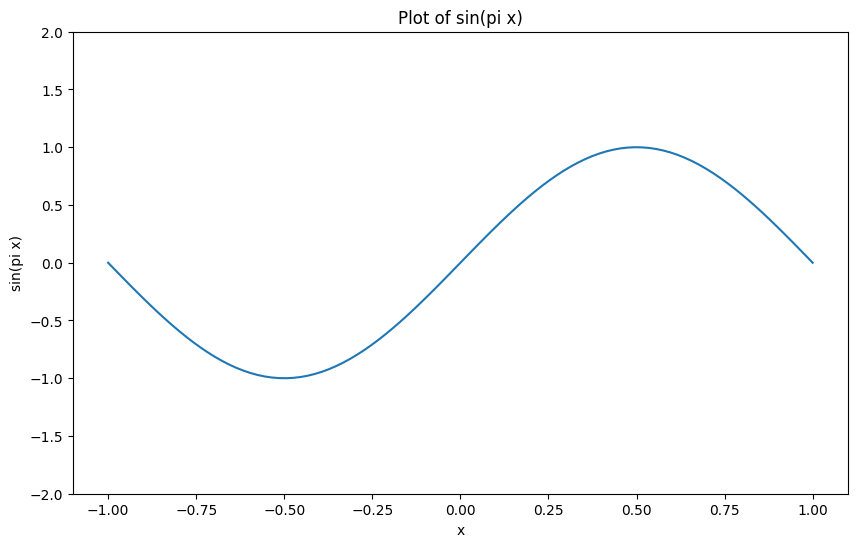

In [181]:
# Generate X features
X = np.linspace(-1, 1, 100)
print(X.shape)

# Compute y values
y = problem(X)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='sin(pi x)')
plt.title('Plot of sin(pi x)')
plt.xlabel('x')
plt.ylabel('sin(pi x)')
plt.ylim(-2, 2)

### Implementation
We need to create four arrays to store the E_in and E_out (error) from every provided sample size.

- ***For E_out***: Firstly, we have to store every y_prediction from every iteration to find the mean of g_d (which is the y_hat from every possible data). Then we can calculate the E_out from bias sqaure + variance, which we need to find the "mean of the model" first. In addition to this, mean of the model in constant model always be zero (so I just return zero from mean model function above).


- ***For E_in***: In term of E_in, we have to store the cost function value that we get from every possible data and mean them to get the mean of error for each sample size.

In [182]:
sample_size_sets = [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

E_in = [[] for _ in range(len(sample_size_sets))]
g_d = [[] for _ in range(len(sample_size_sets))]
E_in_all = []
E_out_all = []
bias_all = []


for i in range(len(sample_size_sets)):
    for _ in range(1000):
        # random i values from problem dataset
        rands_X = np.random.choice(X, sample_size_sets[i])
        y_sample = problem(rands_X)
        
        # for calculate E_out
        y_pred_validation = constantModel(X=rands_X)
        g_d[i].append(y_pred_validation)
        
        # for calculate E_in
        y_pred_training = constantModel(X=rands_X)
        E_in[i].append(costFunction(y_pred=y_pred_training, y=y_sample))

    mean_model = meanModel(g_d[i])
    print("Sample Size: ", sample_size_sets[i])
    
    z = np.square(mean_model - y)
    bias = np.mean(z)
    print(f"Bias: {bias}")
    bias_all.append(bias)
    
    z = np.square(np.array(g_d[i]) - mean_model)
    var_x = np.mean(z)
    variance = np.mean(var_x)
    print(f"Variance: {variance}")
    
    E_out = bias + variance
    print(f"E_out: {E_out}\n")
    E_out_all.append(E_out)


for i in range(len(E_in)):
    E_in_all.append(np.mean(E_in[i]))

print("E_in_all: ",np.array(E_in_all))


Sample Size:  2
Bias: 0.4950712538727884
Variance: 0.24232154897222097
E_out: 0.7373928028450094

Sample Size:  10
Bias: 0.4951622071606551
Variance: 0.04903675604495324
E_out: 0.5441989632056083

Sample Size:  20
Bias: 0.49507194084293693
Variance: 0.022651722321854282
E_out: 0.5177236631647912

Sample Size:  30
Bias: 0.49500205999752284
Variance: 0.016613152158302873
E_out: 0.5116152121558257

Sample Size:  40
Bias: 0.4950151823421598
Variance: 0.012768359615045943
E_out: 0.5077835419572058

Sample Size:  50
Bias: 0.49500326319877785
Variance: 0.009865449183296446
E_out: 0.5048687123820743

Sample Size:  60
Bias: 0.49500156196975525
Variance: 0.008834410434590843
E_out: 0.5038359724043461

Sample Size:  70
Bias: 0.49500580047474174
Variance: 0.007128254170048832
E_out: 0.5021340546447906

Sample Size:  80
Bias: 0.4950015925715109
Variance: 0.006269059101334392
E_out: 0.5012706516728452

Sample Size:  90
Bias: 0.49503049089658846
Variance: 0.005712493697897058
E_out: 0.500742984594485

### Visualize Learning Cruve

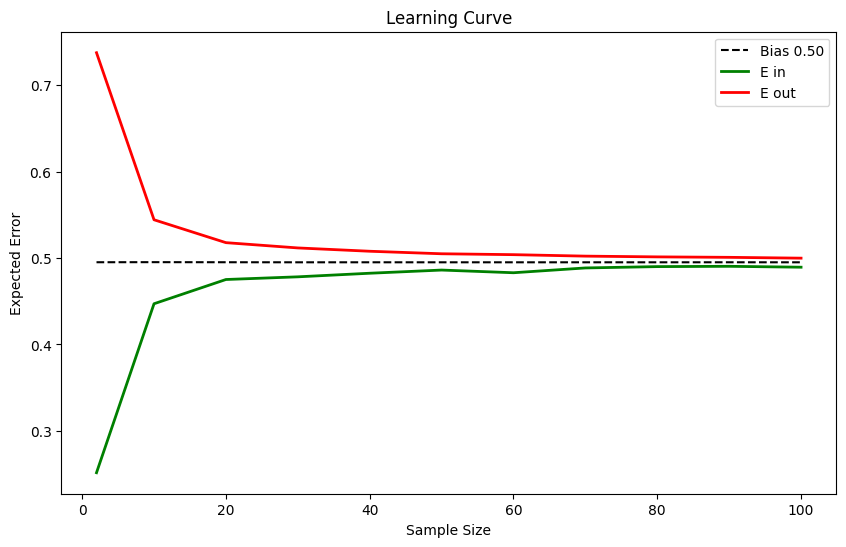

In [183]:
plt.figure(figsize=(10, 6))
bias_avg = np.mean(bias_all)
plt.plot(sample_size_sets, bias_all, label=f'Bias {bias_avg:.2f}', c="black", linestyle='--')
plt.plot(sample_size_sets, E_in_all, label='E in', c="green", linewidth=2.0)
plt.plot(sample_size_sets, E_out_all, label='E out', c="red", linewidth=2.0)
plt.xlabel('Sample Size')
plt.ylabel('Expected Error')
plt.title('Learning Curve')
plt.legend()
plt.show()